Total people: 11
Person 01: 368 images
Person 02: 312 images
Person 03: 310 images
Person 04: 342 images
Person 05: 295 images
Person 06: 274 images
Person 07: 512 images
Person 08: 382 images
Person 09: 318 images
Person 10: 441 images
Person 11: 282 images


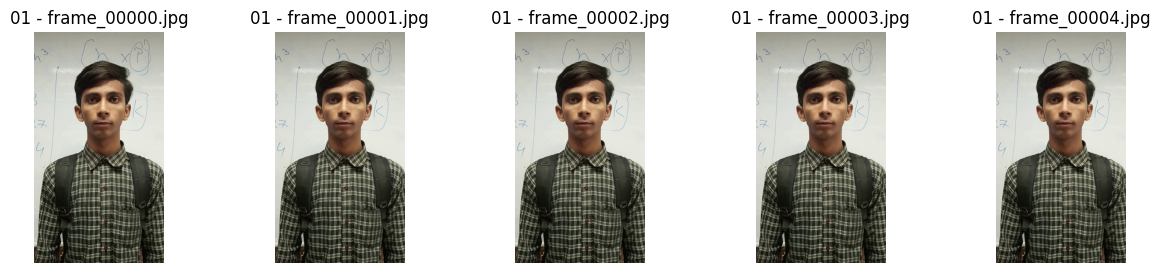

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to your dataset directory
dataset_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\Dataset"

# List all folders (each person)
person_folders = sorted(os.listdir(dataset_path))

# Check the number of people
print("Total people:", len(person_folders))

# Count number of images per person
image_counts = {}
for person_id in person_folders:
    person_path = os.path.join(dataset_path, person_id)
    if os.path.isdir(person_path):
        num_images = len([f for f in os.listdir(person_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        image_counts[person_id] = num_images

# Print image counts
for person, count in image_counts.items():
    print(f"Person {person}: {count} images")

# Plot sample images
def show_sample_images(dataset_path, person_id, num_samples=5):
    person_path = os.path.join(dataset_path, person_id)
    image_files = [f for f in os.listdir(person_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:num_samples]
    
    plt.figure(figsize=(15, 3))
    for i, img_file in enumerate(image_files):
        img = cv2.imread(os.path.join(person_path, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f'{person_id} - {img_file}')
        plt.axis('off')
    plt.show()

# Show example images for person '01'
show_sample_images(dataset_path, "01")

In [ ]:
# Haar cascade frontal face XML (comes with OpenCV)
haar_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(haar_path)

# Define paths
input_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\Dataset"        # replace with your dataset path
output_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_dataset"  # where to save cropped faces

# Create output directory if not exists
os.makedirs(output_path, exist_ok=True)

# Loop over each person folder
for person_id in sorted(os.listdir(input_path)):
    person_input_dir = os.path.join(input_path, person_id)
    person_output_dir = os.path.join(output_path, person_id)

    if not os.path.isdir(person_input_dir):
        continue

    os.makedirs(person_output_dir, exist_ok=True)

    for img_name in os.listdir(person_input_dir):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        
        img_path = os.path.join(person_input_dir, img_name)
        image = cv2.imread(img_path)

        if image is None:
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        # If at least one face detected
        if len(faces) > 0:
            # Choose the largest face (for consistency)
            x, y, w, h = sorted(faces, key=lambda f: f[2]*f[3], reverse=True)[0]
            cropped_face = image[y:y+h, x:x+w]

            # Resize for uniformity (optional)
            cropped_face = cv2.resize(cropped_face, (100, 100))

            # Save to output directory
            save_path = os.path.join(person_output_dir, img_name)
            cv2.imwrite(save_path, cropped_face)

            


Person 01: 345 cropped images
Person 02: 209 cropped images
Person 03: 302 cropped images
Person 04: 321 cropped images
Person 05: 291 cropped images
Person 06: 269 cropped images
Person 07: 385 cropped images
Person 08: 278 cropped images
Person 09: 260 cropped images
Person 10: 342 cropped images
Person 11: 228 cropped images


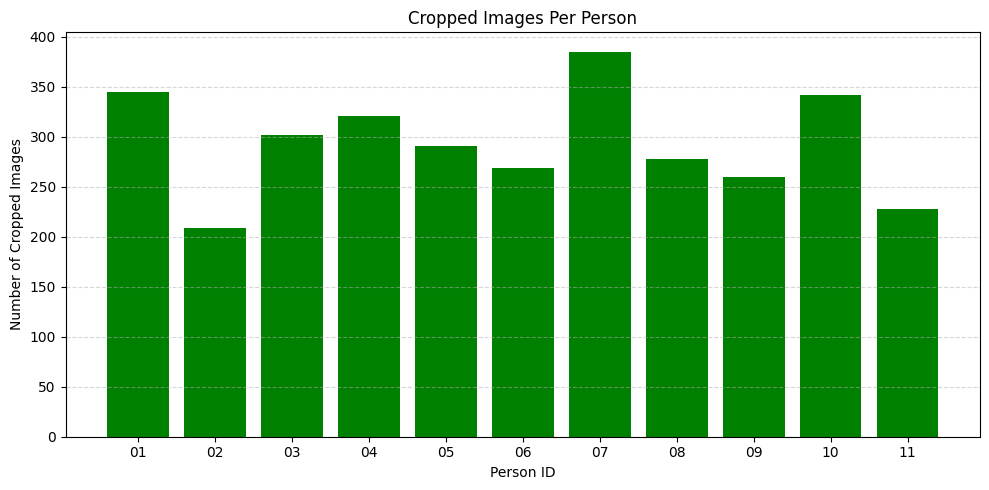

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Path to your cropped dataset
cropped_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_dataset"  # update if different

# Count cropped images per person
cropped_counts = {}

for person_id in sorted(os.listdir(cropped_path)):
    person_folder = os.path.join(cropped_path, person_id)
    if not os.path.isdir(person_folder):
        continue
    count = len([f for f in os.listdir(person_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    cropped_counts[person_id] = count

# Print counts
for person, count in cropped_counts.items():
    print(f"Person {person}: {count} cropped images")

# Plot histogram
labels = list(cropped_counts.keys())
values = [cropped_counts[pid] for pid in labels]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='green')
plt.xlabel('Person ID')
plt.ylabel('Number of Cropped Images')
plt.title('Cropped Images Per Person')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Person 01: 23 images skipped (no face detected)
Person 02: 103 images skipped (no face detected)
Person 03: 8 images skipped (no face detected)
Person 04: 21 images skipped (no face detected)
Person 05: 4 images skipped (no face detected)
Person 06: 5 images skipped (no face detected)
Person 07: 127 images skipped (no face detected)
Person 08: 104 images skipped (no face detected)
Person 09: 58 images skipped (no face detected)
Person 10: 99 images skipped (no face detected)
Person 11: 54 images skipped (no face detected)


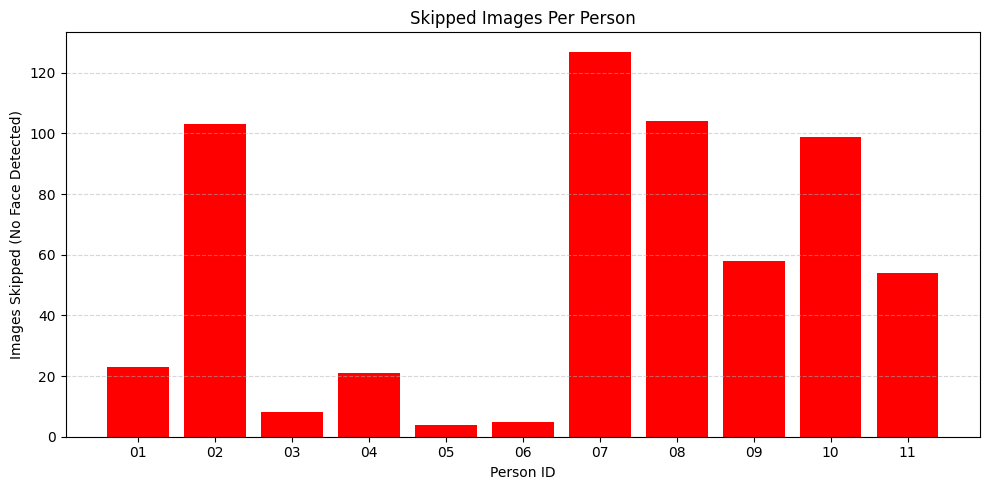

In [11]:
# Define paths
original_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\Dataset"          # folder with all original images
cropped_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_dataset"      # folder with cropped face images

# Initialize counts
skipped_counts = {}

# Loop through all persons
for person_id in sorted(os.listdir(original_path)):
    orig_folder = os.path.join(original_path, person_id)
    crop_folder = os.path.join(cropped_path, person_id)

    if not os.path.isdir(orig_folder):
        continue

    # Count original and cropped images
    orig_count = len([f for f in os.listdir(orig_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    crop_count = 0
    if os.path.exists(crop_folder):
        crop_count = len([f for f in os.listdir(crop_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    skipped = orig_count - crop_count
    skipped_counts[person_id] = skipped

# Print skipped image counts
for person, count in skipped_counts.items():
    print(f"Person {person}: {count} images skipped (no face detected)")

# Plot histogram
labels = list(skipped_counts.keys())
values = [skipped_counts[pid] for pid in labels]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='red')
plt.xlabel('Person ID')
plt.ylabel('Images Skipped (No Face Detected)')
plt.title('Skipped Images Per Person')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
#Grayscaling the already cropped images 

cropped_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_dataset"                # already cropped color images
grayscale_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"            # new folder for grayscale images

# Loop through each person's folder
for person_id in sorted(os.listdir(cropped_path)):
    person_input_dir = os.path.join(cropped_path, person_id)
    person_output_dir = os.path.join(grayscale_path, person_id)

    if not os.path.isdir(person_input_dir):
        continue

    os.makedirs(person_output_dir, exist_ok=True)

    for img_name in os.listdir(person_input_dir):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(person_input_dir, img_name)
        image = cv2.imread(img_path)

        if image is None:
            continue

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        save_path = os.path.join(person_output_dir, img_name)
        cv2.imwrite(save_path, gray_image)

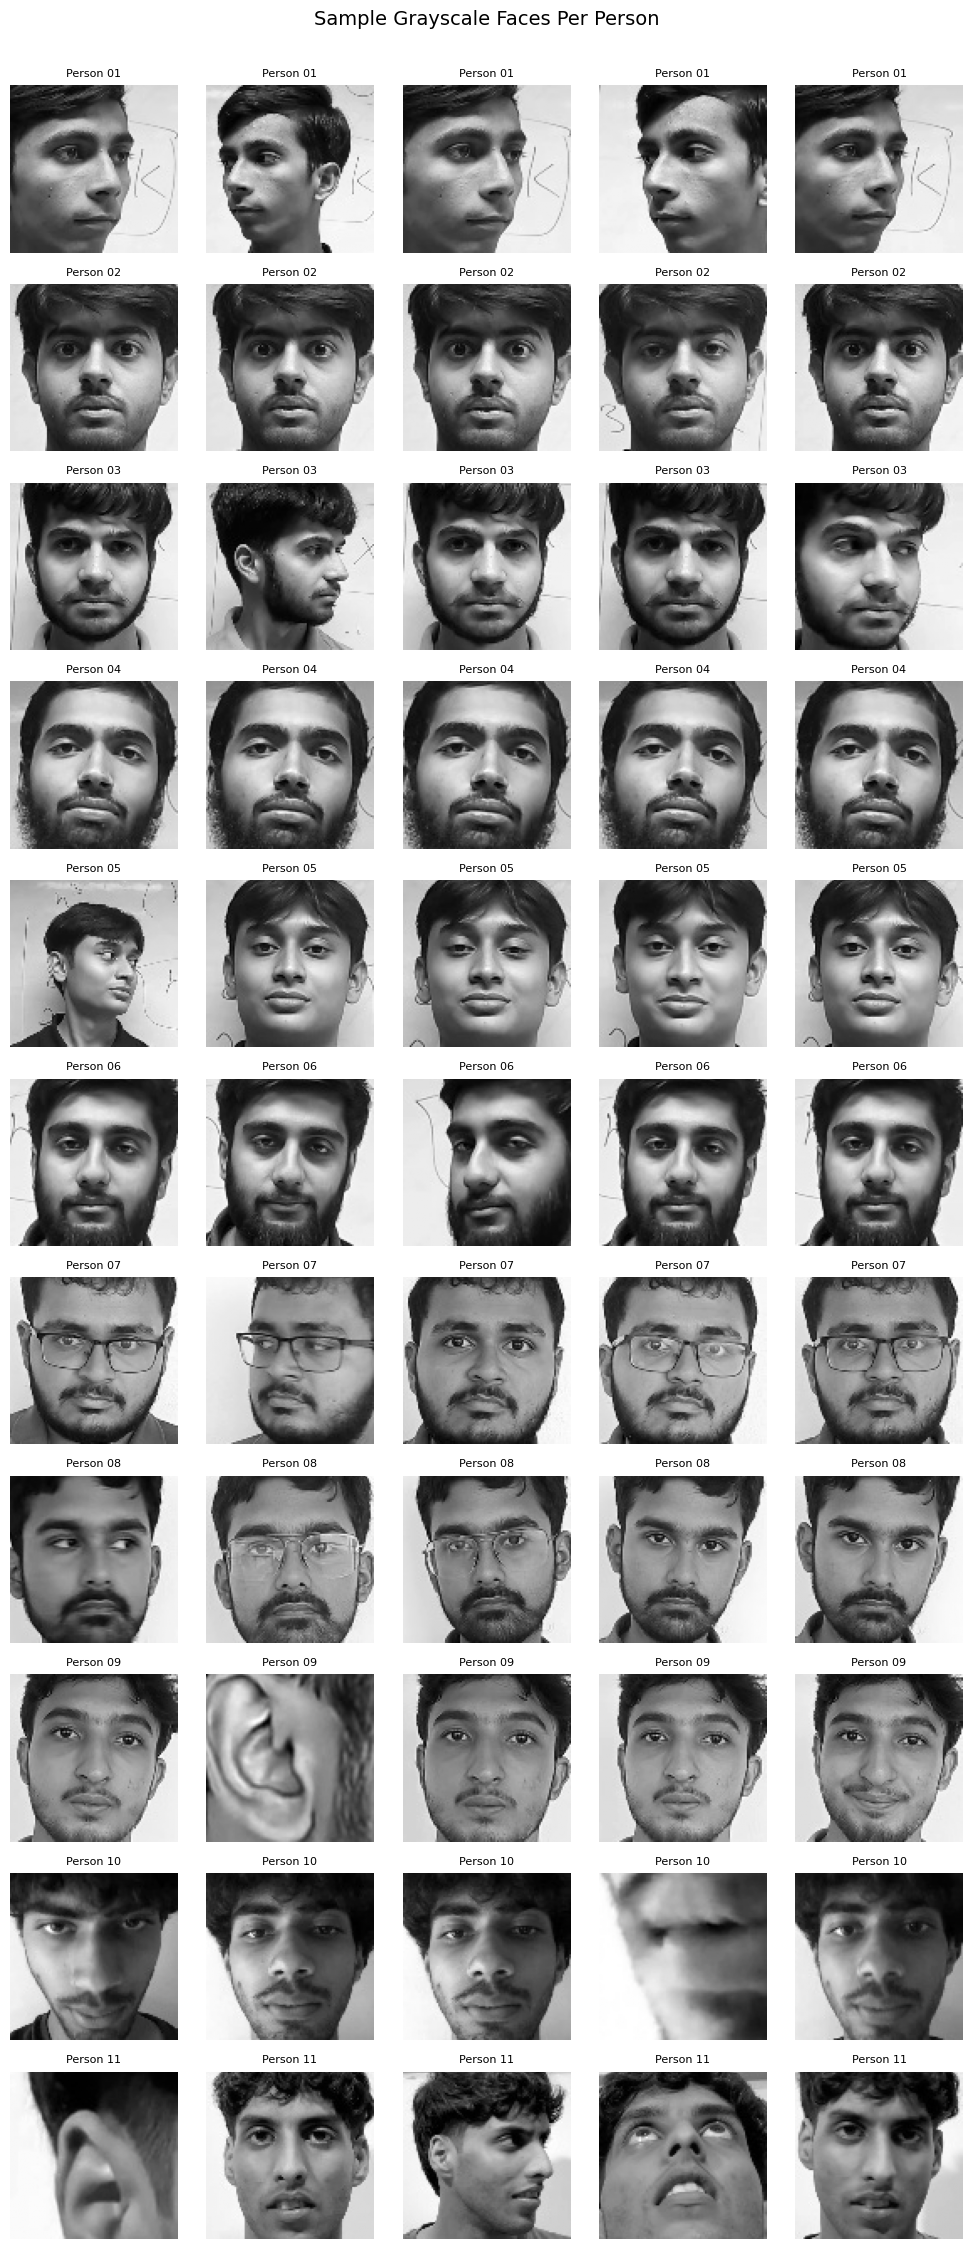

In [14]:
#Visualise few samples per person 

import random

# Path to grayscale images
grayscale_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"

# How many images to show per person
num_samples = 5

# Get sorted list of persons
person_ids = sorted(os.listdir(grayscale_path))

# Plot setup
plt.figure(figsize=(num_samples * 2, len(person_ids) * 2))

for row, person_id in enumerate(person_ids):
    person_folder = os.path.join(grayscale_path, person_id)
    if not os.path.isdir(person_folder):
        continue

    images = [f for f in os.listdir(person_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    selected = random.sample(images, min(num_samples, len(images)))

    for col, img_name in enumerate(selected):
        img_path = os.path.join(person_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(len(person_ids), num_samples, row * num_samples + col + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Person {person_id}", fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.suptitle("Sample Grayscale Faces Per Person", fontsize=14, y=1.02)
plt.show()

In [18]:
#resize to a 100x100

# Input and output paths
input_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"
resized_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_gray_resized"

# Loop through each person's folder
for person_id in sorted(os.listdir(input_path)):
    person_input_dir = os.path.join(input_path, person_id)
    person_output_dir = os.path.join(resized_path, person_id)

    if not os.path.isdir(person_input_dir):
        continue

    os.makedirs(person_output_dir, exist_ok=True)

    for img_name in os.listdir(person_input_dir):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(person_input_dir, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            continue

        resized_img = cv2.resize(image, (100, 100))
        save_path = os.path.join(person_output_dir, img_name)
        cv2.imwrite(save_path, resized_img)


In [19]:
#recheck image shape: should be a (100,100)

#Check image shape 

shapes = []
for person in os.listdir(resized_path):
    for img_name in os.listdir(os.path.join(resized_path, person)):
        img_path = os.path.join(resized_path, person, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            shapes.append(img.shape)

print("Unique shapes in dataset:", set(shapes))

Unique shapes in dataset: {(100, 100)}
